In [9]:
import pandas as pd
import numpy as np

data = pd.read_csv('d:\python2025/000001.csv')
data['Day'] = pd.to_datetime(data['Day'],format='%Y/%m/%d')
data.set_index('Day', inplace=True)

import scipy.stats as stats
import scipy

from datetime import datetime
import calendar
import statsmodels.api as sm
import statsmodels.formula.api as smf

from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from matplotlib import ticker as mticker

import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
pd.set_option('display.max_columns', None)




In [10]:
data = pd.read_csv('d:\python2025/000001.csv')
data['Day'] = pd.to_datetime(data['Day'],format='%Y/%m/%d')
data.set_index('Day', inplace=True)
data

,Preclose,Open,Highest,Lowest,Close
Day,,,,,
1990-12-19,,96.050,99.980,95.790,99.980
1990-12-20,99.98,104.300,104.390,99.980,104.390
1990-12-21,104.39,109.070,109.130,103.730,109.130
1990-12-24,109.13,113.570,114.550,109.130,114.550
1990-12-25,114.55,120.090,120.250,114.550,120.250
...,...,...,...,...,...
2025-08-25,3825.759,3848.163,3883.562,3839.972,3883.562
2025-08-26,3883.562,3871.471,3888.599,3859.758,3868.382
2025-08-27,3868.382,3869.612,3887.198,3800.350,3800.350


In [11]:
data_new = data['1995-01-01':'2025-08-31'].copy()
data_new['Close'] = pd.to_numeric(data_new['Close'], errors='coerce')
data_new["Preclose"] = pd.to_numeric(data_new["Preclose"], errors='coerce')
data_new["Raw_return"] = (data_new["Close"] - data_new["Preclose"]) / data_new["Preclose"]
data_new

,Preclose,Open,Highest,Lowest,Close,Raw_return
Day,,,,,,
1995-01-03,647.870,637.720,647.710,630.530,639.880,-0.012333
1995-01-04,639.880,641.900,655.510,638.860,653.810,0.021770
1995-01-05,653.810,655.380,657.520,645.810,646.890,-0.010584
1995-01-06,646.890,642.750,643.890,636.330,640.760,-0.009476
1995-01-09,640.760,637.520,637.550,625.040,626.000,-0.023035
...,...,...,...,...,...,...
2025-08-25,3825.759,3848.163,3883.562,3839.972,3883.562,0.015109
2025-08-26,3883.562,3871.471,3888.599,3859.758,3868.382,-0.003909
2025-08-27,3868.382,3869.612,3887.198,3800.350,3800.350,-0.017587


In [12]:
Month_data = data_new['Raw_return'].resample('M').apply(lambda x: (x + 1).prod() - 1)
Month_data

Day
1995-01-31   -0.131631
1995-02-28   -0.023694
1995-03-31    0.177803
1995-04-30   -0.103552
1995-05-31    0.207922
                ...   
2025-04-30   -0.017002
2025-05-31    0.020877
2025-06-30    0.028959
2025-07-31    0.037389
2025-08-31    0.079682
Freq: M, Name: Raw_return, Length: 368, dtype: float64

In [19]:
# ...existing code...
Month_data = data_new['Raw_return'].resample('M').apply(lambda x: (x + 1).prod() - 1)
Month_data = Month_data.to_frame(name='Raw_return')
Month_data['Ret'] = Month_data['Raw_return']  # 新增辅助字段Ret

Month_data['Year'] = Month_data.index.year
Month_data['Month'] = Month_data.index.month
Month_data['Month_name'] = Month_data.index.strftime('%b')
Month_data['Decade'] = (Month_data['Year'] // 10) * 10
Month_data['Rolling_ann_return'] = (1 + Month_data['Ret']).rolling(window=12, min_periods=12).apply(lambda x: np.prod(x) - 1, raw=True)
Month_data['Rolling_ann_vol'] = Month_data['Ret'].rolling(window=12, min_periods=12).std() * np.sqrt(12)
Month_data
# ...existing code...

,Raw_return,Ret,Year,Month,Month_name,Decade,Rolling_ann_return,Rolling_ann_vol
Day,,,,,,,,
1995-01-31,-0.131631,-0.131631,1995,1,Jan,1990,NaN,NaN
1995-02-28,-0.023694,-0.023694,1995,2,Feb,1990,NaN,NaN
1995-03-31,0.177803,0.177803,1995,3,Mar,1990,NaN,NaN
1995-04-30,-0.103552,-0.103552,1995,4,Apr,1990,NaN,NaN
1995-05-31,0.207922,0.207922,1995,5,May,1990,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-04-30,-0.017002,-0.017002,2025,4,Apr,2020,0.056108,0.194748
2025-05-31,0.020877,0.020877,2025,5,May,2020,0.084447,0.194829
2025-06-30,0.028959,0.028959,2025,6,Jun,2020,0.160754,0.188752


月度收益图

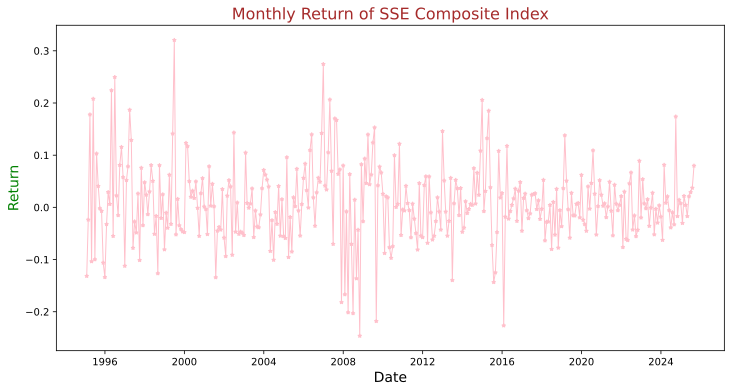

In [35]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(
    'Ret',
    '*-',
    color='pink',
    label='Monthly Return',
    linewidth=1,
    markersize=4,
    data=Month_data,
)
ax.set_title('Monthly Return of SSE Composite Index', fontsize=16,color='brown')
ax.set_ylabel('Return', fontsize=14,color='green')
ax.set_xlabel('Date', fontsize=14)
plt.show();

季度收益图

In [38]:

Quarter_data = data_new['Raw_return'].resample('Q').apply(lambda x: (x + 1).prod() - 1).to_frame(name='Ret')
Quarter_data['Year'] = Quarter_data.index.year
Quarter_data['Quarter'] = Quarter_data.index.quarter
Quarter_data['Quarter_name'] = 'Q' + Quarter_data['Quarter'].astype(str)
Quarter_data['Decade'] = (Quarter_data['Year'] // 10) * 10
Quarter_data['Rolling_ann_return'] = (1 + Quarter_data['Ret']).rolling(window=4, min_periods=4).apply(lambda x: np.prod(x) - 1, raw=True)
Quarter_data['Rolling_ann_vol'] = Quarter_data['Ret'].rolling(window=4, min_periods=4).std() * np.sqrt(4)
Quarter_data


,Ret,Year,Quarter,Quarter_name,Decade,Rolling_ann_return,Rolling_ann_vol
Day,,,,,,,
1995-03-31,-0.001466,1995,1,Q1,1990,NaN,NaN
1995-06-30,-0.025258,1995,2,Q2,1990,NaN,NaN
1995-09-30,0.145660,1995,3,Q3,1990,NaN,NaN
1995-12-31,-0.231358,1995,4,Q4,1990,-0.142899,0.310320
1996-03-31,0.001981,1996,1,Q1,1990,-0.139940,0.310733
...,...,...,...,...,...,...,...
2024-09-30,0.124383,2024,3,Q3,2020,0.072665,0.150115
2024-12-31,0.004575,2024,4,Q4,2020,0.126668,0.129336
2025-03-31,-0.004779,2025,1,Q1,2020,0.096864,0.134695


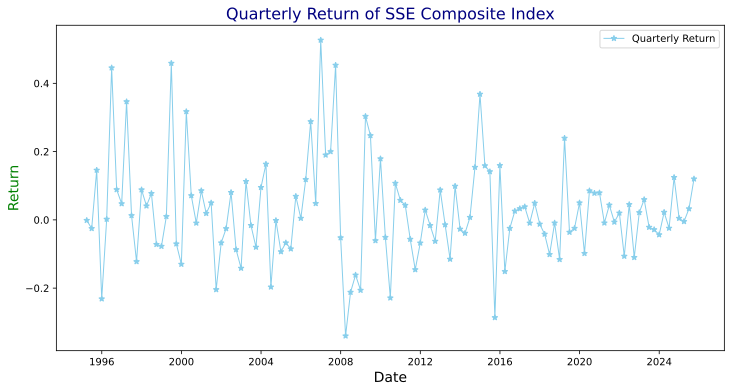

In [39]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(
    Quarter_data.index,
    Quarter_data['Ret'],
    marker='*',
    linestyle='-',
    color='skyblue',
    label='Quarterly Return',
    linewidth=1,
    markersize=6,
)
ax.set_title('Quarterly Return of SSE Composite Index', fontsize=16, color='navy')
ax.set_ylabel('Return', fontsize=14, color='green')
ax.set_xlabel('Date', fontsize=14)
ax.legend()
plt.show()


年度收益图

In [41]:
Year_data = data_new.resample('Y')['Raw_return'].apply(lambda x: (x + 1).prod() - 1).to_frame(name='Ret')
Year_data['Year'] = Year_data.index.year
Year_data['Decade'] = (Year_data['Year'] // 10) * 10
Year_data['Rolling_ann_return'] = (1 + Year_data['Ret']).rolling(window=1, min_periods=1).apply(lambda x: np.prod(x) - 1, raw=True) 
Year_data['Rolling_ann_vol'] = Year_data['Ret'].rolling(window=1, min_periods=1).std() * np.sqrt(1)
Year_data

,Ret,Year,Decade,Rolling_ann_return,Rolling_ann_vol
Day,,,,,
1995-12-31,-0.142899,1995,1990,-0.142899,NaN
1996-12-31,0.651425,1996,1990,0.651425,NaN
1997-12-31,0.302153,1997,1990,0.302153,NaN
1998-12-31,-0.039695,1998,1990,-0.039695,NaN
1999-12-31,0.191750,1999,1990,0.191750,NaN
2000-12-31,0.517277,2000,2000,0.517277,NaN
2001-12-31,-0.206180,2001,2000,-0.206180,NaN
2002-12-31,-0.175167,2002,2000,-0.175167,NaN
2003-12-31,0.102670,2003,2000,0.102670,NaN


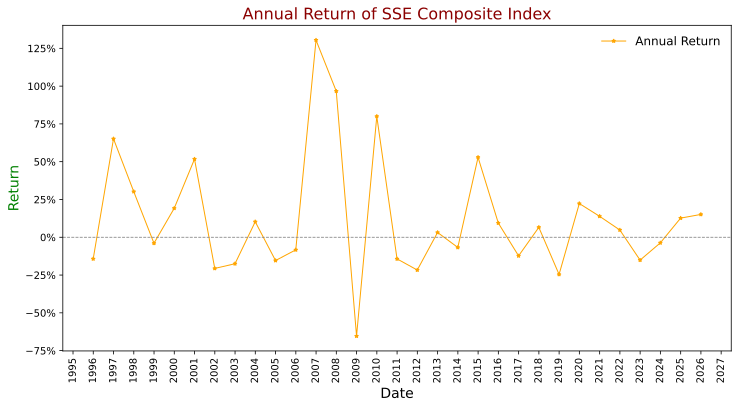

In [55]:
import os
#先获取桌面路径，然后拼接保存路径
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
save_path = os.path.join(desktop_path, "000001_annual_return.pdf")
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(
   'Ret',
   '*-',
   color="#FFA500",
   label='Annual Return',
   linewidth=1,
   markersize=4,
   data=Year_data,
   )
ax.set_title('Annual Return of SSE Composite Index', fontsize=16, color='darkred')
ax.set_ylabel('Return', fontsize=14, color='green')
ax.set_xlabel('Date', fontsize=14)
data_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(data_format)
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))
plt.legend(loc = 'upper right',frameon=False, fontsize=12)
plt.xticks(rotation=90)
ax.axhline(0, color='gray', linewidth=0.8, linestyle='--')
fig.savefig(save_path, bbox_inches='tight')
plt.show()

最大回测

In [ ]:
data_new = data['1995-01-01':'2024-08-31'].copy()
data_new['Close'] = pd.to_numeric(data_new['Close'])
data_new['Preclose'] = pd.to_numeric(data_new['Preclose'])
#第一种计算上证指数日收益率方法
data_new["Raw_return"] = (data_new["Close"] - data_new["Preclose"]) / data_new["Preclose"]
data_new


,Preclose,Open,Highest,Lowest,Close,Raw_return
Day,,,,,,
1995-01-03,647.870,637.720,647.710,630.530,639.880,-0.012333
1995-01-04,639.880,641.900,655.510,638.860,653.810,0.021770
1995-01-05,653.810,655.380,657.520,645.810,646.890,-0.010584
1995-01-06,646.890,642.750,643.890,636.330,640.760,-0.009476
1995-01-09,640.760,637.520,637.550,625.040,626.000,-0.023035
...,...,...,...,...,...,...
2024-08-26,2854.368,2855.474,2860.655,2844.383,2855.520,0.000404
2024-08-27,2855.520,2850.877,2853.780,2843.158,2848.731,-0.002378
2024-08-28,2848.731,2844.327,2852.562,2830.962,2837.429,-0.003967


In [ ]:
#第二种计算上证指数日收益率方法
data_new['Cum_return'] = (1 + data_new['Raw_return']).cumprod() - 1
data_new

,Preclose,Open,Highest,Lowest,Close,Raw_return,Cum_return
Day,,,,,,,
1995-01-03,647.870,637.720,647.710,630.530,639.880,-0.012333,-0.012333
1995-01-04,639.880,641.900,655.510,638.860,653.810,0.021770,0.009169
1995-01-05,653.810,655.380,657.520,645.810,646.890,-0.010584,-0.001513
1995-01-06,646.890,642.750,643.890,636.330,640.760,-0.009476,-0.010974
1995-01-09,640.760,637.520,637.550,625.040,626.000,-0.023035,-0.033757
...,...,...,...,...,...,...,...
2024-08-26,2854.368,2855.474,2860.655,2844.383,2855.520,0.000404,3.407557
2024-08-27,2855.520,2850.877,2853.780,2843.158,2848.731,-0.002378,3.397078
2024-08-28,2848.731,2844.327,2852.562,2830.962,2837.429,-0.003967,3.379633


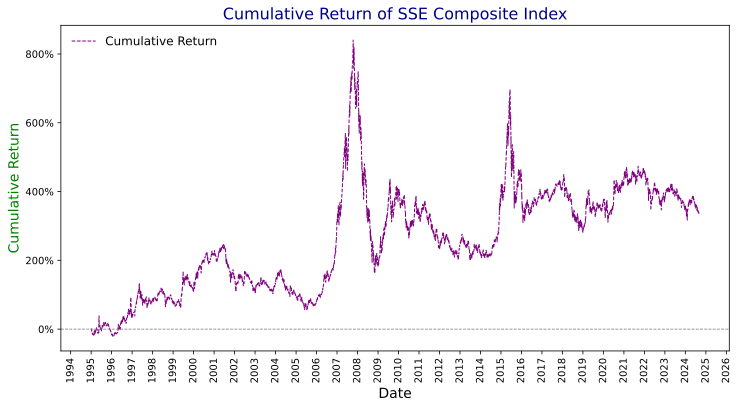

In [54]:
import os
#先获取桌面路径，然后拼接保存路径
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
save_path = os.path.join(desktop_path, "000001_cumulative_return.pdf")
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(
    'Cum_return',
    '--',
    color='purple',
    label='Cumulative Return',
    linewidth=1,
    data=data_new)

ax.set_title('Cumulative Return of SSE Composite Index', fontsize=16, color='darkblue')
ax.set_ylabel('Cumulative Return', fontsize=14, color='green')
ax.set_xlabel('Date', fontsize=14)
data_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(data_format)
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))
plt.legend(loc = 'upper left',frameon=False, fontsize=12)
plt.xticks(rotation=90)

plt.axhline(0, color='gray', linewidth=0.8, linestyle='--')
fig.savefig(save_path, bbox_inches='tight')
plt.show()